In [885]:
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt
import seaborn as sns # both for plotting

#reading datasets
df = pd.read_csv('/kaggle/input/adult-pmr3508/train_data.csv', na_values='?', engine='python', sep=r'\s*,\s*')
test = pd.read_csv('/kaggle/input/adult-pmr3508/test_data.csv', na_values='?', engine='python', sep=r'\s*,\s*')


## Exploring the Datasets

In [886]:
print(df.shape) # shape: df attribute (tuple)

ratio = df.shape[0]/df.shape[1]
print(f'ratio = {ratio}')

(32560, 16)
ratio = 2035.0


There are 15 covariables + 1 target column for 32560 instances.<br>This results in a 2035 observations/features ratio, which represents a good amount of information given the number of features we have.

In [887]:
df.head(6) ## head - DataFrame which shows the n first instances of the dataset (here, n = 6).

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
5,16285,57,Private,163047,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,38,United-States,<=50K


In [888]:
df.info() ## info - DataFrame method which shows information on the features names, datatypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [889]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              16280 non-null  int64 
 1   age             16280 non-null  int64 
 2   workclass       15317 non-null  object
 3   fnlwgt          16280 non-null  int64 
 4   education       16280 non-null  object
 5   education.num   16280 non-null  int64 
 6   marital.status  16280 non-null  object
 7   occupation      15314 non-null  object
 8   relationship    16280 non-null  object
 9   race            16280 non-null  object
 10  sex             16280 non-null  object
 11  capital.gain    16280 non-null  int64 
 12  capital.loss    16280 non-null  int64 
 13  hours.per.week  16280 non-null  int64 
 14  native.country  16006 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.9+ MB


Above we can see the datatypes for each feature in both the train and the test dataset:
- Categorical Features: workclass, marital.status, occupation, relationship, race, sex, native.country<br>
- Continuous Features: Id (useless), age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week<br>
- Target: income (categorical)

In [890]:
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
continuous_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

### Missing Values Percentage

Quantitative analysis of the missing data in the dataset.

Missing Values Percentage:

In [891]:
df.isna().mean()*100

Id                0.000000
age               0.000000
workclass         5.638821
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660319
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790541
income            0.000000
dtype: float64

In [892]:
test.isna().mean()*100

Id                0.000000
age               0.000000
workclass         5.915233
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.933661
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.683047
dtype: float64

We can see that the test and the train data have similar issues (same columns w/ missing data and similar missing data rates).<br>We are going to process them the same way in all the following steps - from cleaning to preprocessing.

Missing Values Count:


In [893]:
df.isna().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [894]:
test.isna().sum()

Id                  0
age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
dtype: int64

- Features w/ missing data: workclass, occupation e native.country;

### Numerical Metrics for Continuous Features

In [895]:
df.describe() ## describe - shows numerical metrics such as sums, means, deviations, min and max values 
## and distributions for only the numerical columns (datatypes int and float).

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The Id column is useless. We can see that the min, mean and max values for the other features are coherent (no outliers), even though some of them are imbalanced (capital gain and loss have 75 or more percent of null values, which may indicate that their max values may be high-leverage points).

# Data Cleaning
Tasks:
- The dataset has missing data. We must deal with them
- Id column is not useful, we should remove it. fnlwgt also doesn't carry that much information, since it relates to how many people in the u.s. fit a given profile (here, each line/instance). This metric is not important for our model.

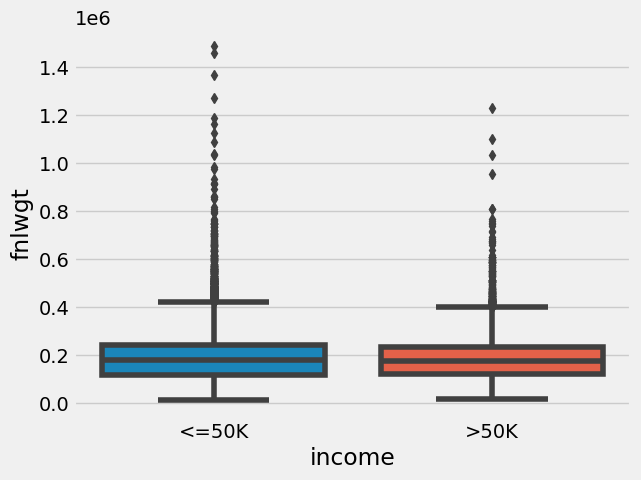

In [896]:
sns.boxplot(data=df, x='income', y='fnlwgt')
plt.show()

We can confirm above that fnlwgt is not relevant for the classification, since it has similar distributions in each prediction label. Let's delete it along with the Id column.

In [897]:
df.drop(axis=1, labels=['Id', 'fnlwgt'], inplace=True)
test.drop(axis=1, labels=['Id', 'fnlwgt'], inplace=True)

In [898]:
continuous_features.remove('fnlwgt')

(Again, all following processes are going to be applied to both the train and the test dataset).

### Native Country Feature

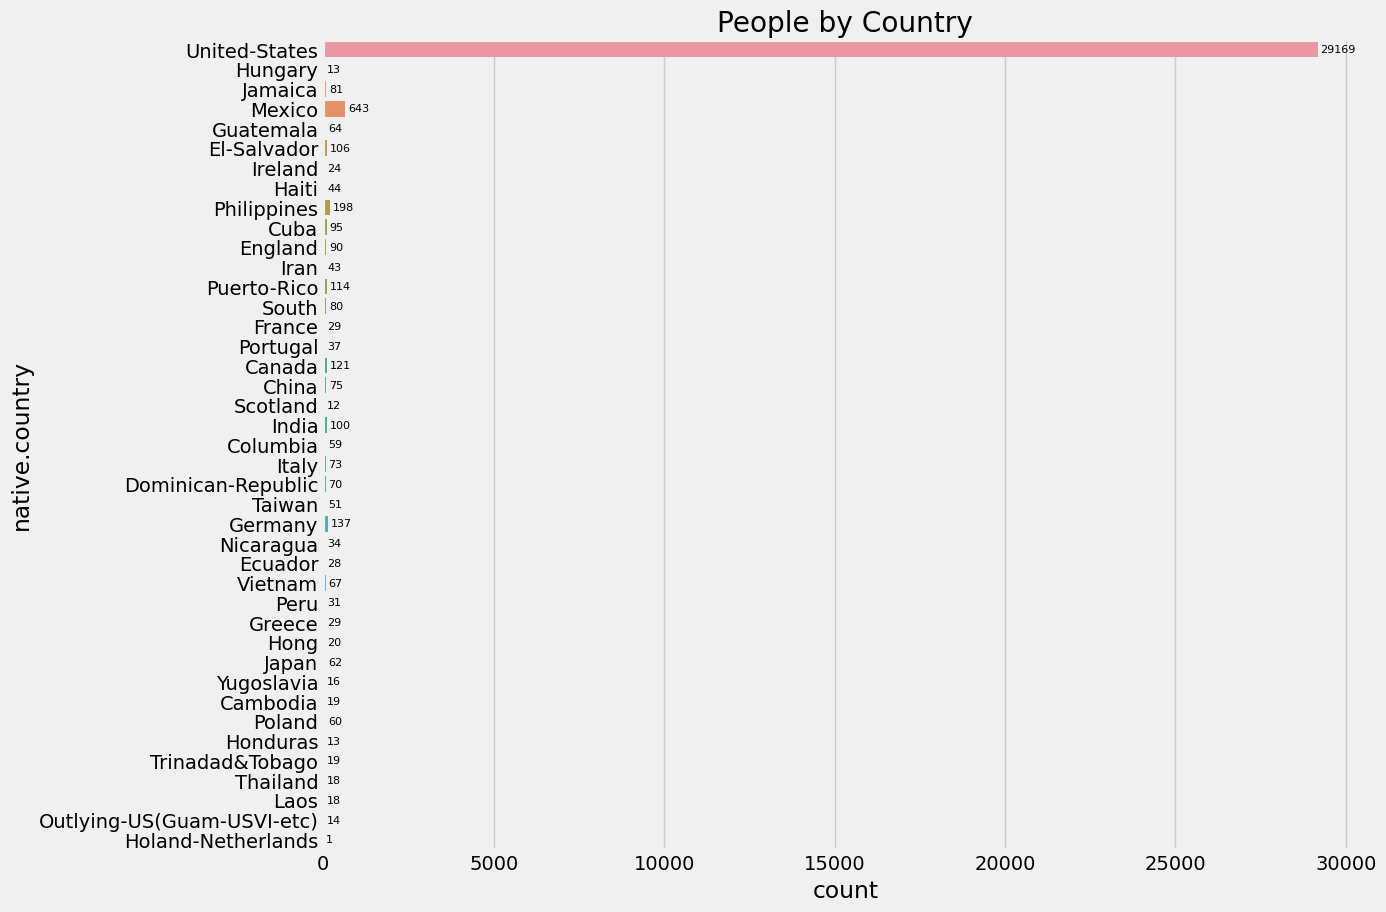

In [899]:
## countplot for each native country using sns's countplot
plt.figure(figsize=(12, 10))
country_plot = sns.countplot(data=df, y='native.country')

for i in country_plot.patches:
    country_plot.annotate(int(i.get_width()),   # using annotate to display the counts 
                (i.get_width(), i.get_y() + i.get_height() / 2),  
                ha='left',  # Horizontal Alignment
                va='center',  # Vertical Alignment
                fontsize=8,
                color='black',
                xytext=(2, 0), 
                textcoords='offset points')
    
plt.title("People by Country")
plt.show()

In [900]:
df['native.country'].isna().mean()*100

1.7905405405405406

Analysing the information above, we conclude that the amount of missing data for this feature is extremely small while the dataset is also really imbalanced for this column. Thus, it'd be sensible to just replace all missing values by the most frequent one (the US), and also simplify all these many categories.

Replacing the few null values by the mode:

In [901]:
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)
test['native.country'].fillna(test['native.country'].mode()[0], inplace=True)

Looking now at the many categories we saw:

In [902]:
df['native.country'].unique() # unique - Series method to show all the values that appear at the sequence

array(['United-States', 'Hungary', 'Jamaica', 'Mexico', 'Guatemala',
       'El-Salvador', 'Ireland', 'Haiti', 'Philippines', 'Cuba',
       'England', 'Iran', 'Puerto-Rico', 'South', 'France', 'Portugal',
       'Canada', 'China', 'Scotland', 'India', 'Columbia', 'Italy',
       'Dominican-Republic', 'Taiwan', 'Germany', 'Nicaragua', 'Ecuador',
       'Vietnam', 'Peru', 'Greece', 'Hong', 'Japan', 'Yugoslavia',
       'Cambodia', 'Poland', 'Honduras', 'Trinadad&Tobago', 'Thailand',
       'Laos', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

Let's now simplify some of these excessive unique values to their continents:

In [903]:
## defining a function to simplify the values

def simplify_origin(country):
    asia = ['China', 'India', 'Iran', 'Japan', 'Taiwan', 'Vietnam', 'Cambodia', 'Hong', 'Laos', 'Thailand', 'Philippines']
    europe = ['England', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia', 'Holand-Netherlands']
    latin_america = ['Columbia', 'Cuba', 'Dominican Republic', 'Ecuador', 'El-Salvador', 'Guatemala', 'Haiti',
                     'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Peru', 'South', 'Dominican-Republic',
                     'Trinadad&Tobago']

    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in latin_america:
        return 'Latin America'
    return country

## this function will maintain the U.S., Canada, 'Puerto Rico', 'Outlying-US' and the 3 continents above.

In [904]:
df['native.country'] = df['native.country'].apply(simplify_origin) 
test['native.country'] = test['native.country'].apply(simplify_origin)
## apply - Series method which allows us to apply a function iteratively in all the values in the Series

In [905]:
df['native.country'].unique()

array(['United-States', 'Europe', 'Latin America', 'Asia', 'Puerto-Rico',
       'Canada', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

### Occupation Feature

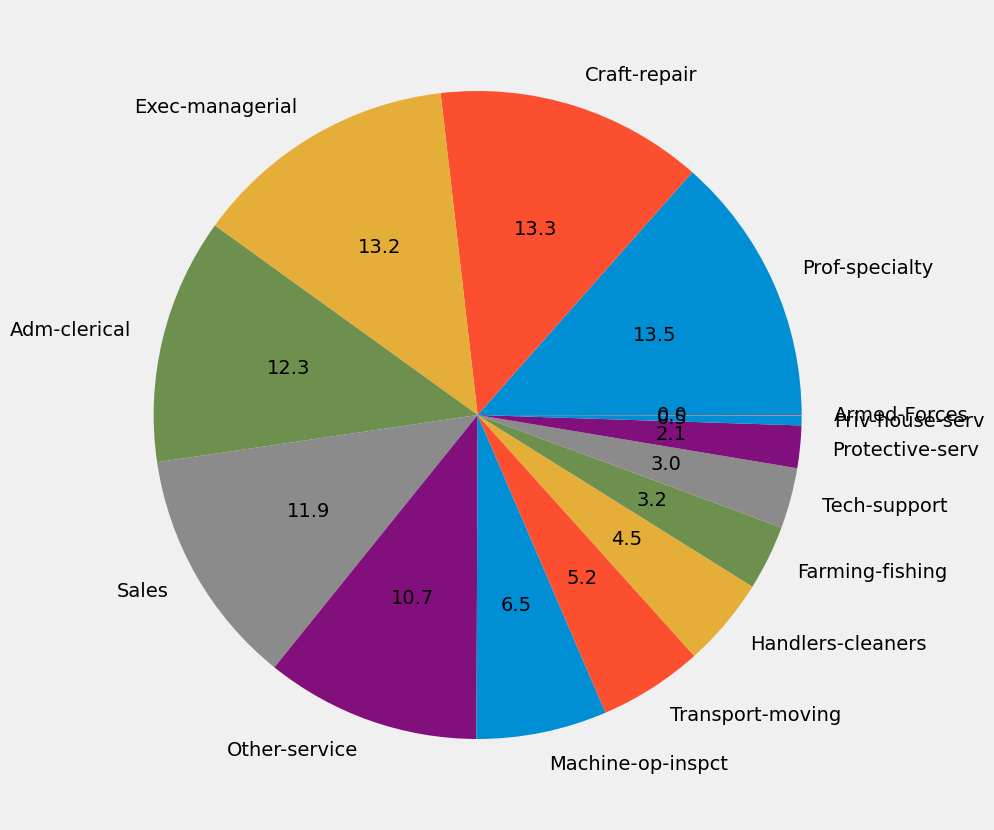

In [906]:
plt.figure(figsize=(10, 10))
occupations = df.occupation.value_counts()
plt.pie(occupations, labels=occupations.index, autopct="%.1f")
plt.show()

We can see from the pie chart above that, in opposition to the feature before, the occupation labels are more well-distributed. Therefore, it'd be wise to have some logical choice for the substitutions on the missing data.<br>
<br>
We could try to find another label which relates to occupation in order to not make any incoherent inferences - the best one, which is continuous and, thus, able to be sorted, is education.num.

In [907]:
df.sort_values('education.num') ## sort - sort column values in ascending order

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
30521,59,Private,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,Latin America,<=50K
15283,39,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,12,United-States,<=50K
15329,54,NaN,Preschool,1,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,Latin America,<=50K
14976,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Asia,<=50K
15834,54,Private,Preschool,1,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Asia,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,58,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
5086,39,Self-emp-not-inc,Doctorate,16,Divorced,Adm-clerical,Other-relative,Other,Male,0,0,40,United-States,<=50K
27414,31,Private,Doctorate,16,Married-spouse-absent,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,60,Asia,<=50K
25593,39,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K



Above we can already check the difference in the occupations between people with education.num = 1 
and people with education.num = 16.

In [908]:
df.occupation.fillna(method='ffill', inplace=True) 
# fillna - method to null values replacing that, here, will fill them with the last line's value

By the method above, after we sorted the dataset lines by education.num, we are using each line\`s neighbor to imply the person\`s occupation

In [909]:
# repeating for the test dataset
test.sort_values('education.num')
test.occupation.fillna(method='ffill', inplace=True)

### Workclass Feature

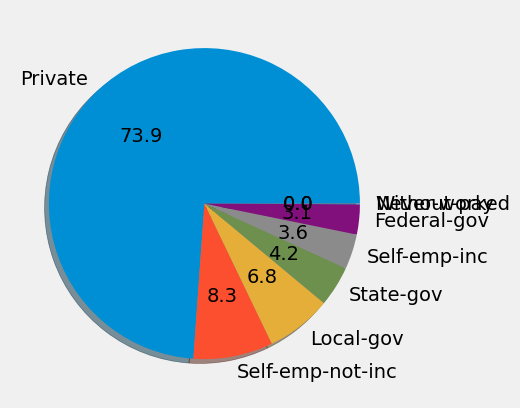

In [910]:
wc = df.workclass.value_counts()
plt.pie(wc, labels=wc.index, autopct="%.1f", shadow = True)
plt.show()

In [911]:
df.workclass.isna().mean()*100

5.638820638820639

Analogously to the native country case, we have imbalanced values and a reasonably small amount of null values. Thus, we might replace them by the mode.

In [912]:
df.workclass.fillna(df.workclass.mode()[0], inplace=True)
test.workclass.fillna(test.workclass.mode()[0], inplace=True)

In [913]:
df.workclass.value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Let's also simplify these unique values by aggregating all the government jobs, all the self-employed jobs, as well as the without-pay and never-worked.

In [914]:
# workclass function to simplify it
def simplify_wc(value):
    if 'gov' in value:
        return "Government"
    elif 'Self' in value:
        return 'Self-employed'
    elif ('Without' in value) or ('Never' in value):
        return 'Non-paid/Unemployed'
    return value

In [915]:
df['workclass'] = df['workclass'].apply(simplify_wc)
test['workclass'] = test['workclass'].apply(simplify_wc)

In [916]:
df.workclass.unique()

array(['Private', 'Government', 'Self-employed', 'Non-paid/Unemployed'],
      dtype=object)

Now we have only 4 unique values.

### Relationship Column

In [917]:
df.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

We can see that we have both Husband and Wife as unique values. Let\`s reduce them to Spouse only

In [918]:
def simplify_rs(value):
    if value == 'Husband' or value == 'Wife':
        return 'Spouse'
    return value

In [919]:
df.relationship = df.relationship.apply(simplify_rs)
test.relationship = test.relationship.apply(simplify_rs)

### Capital Gain feature

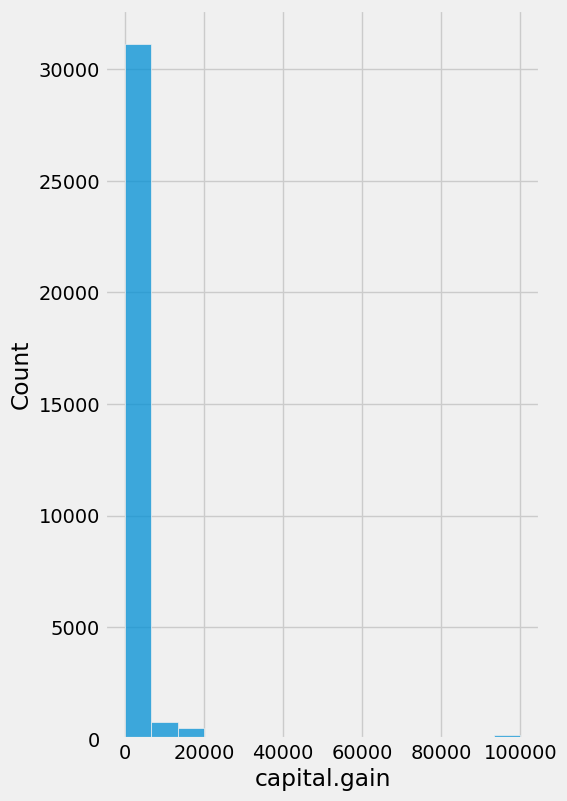

In [920]:
plt.figure(figsize=(5, 9))
sns.histplot(df['capital.gain'], bins = 15)
plt.show()

We can see in the chart above that we have a potential outlier in the capital gain column - there are few people with over 100.000 as capital income. If we keep this value it'll aniquilate the information of this feature in the KNN model, thus, it'd be sensible to replace it.

In [921]:
df['capital.gain'].value_counts().sort_index()

capital.gain
0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: count, Length: 119, dtype: int64

The number itself is a bit weird - 99999, which may indicate it's not real, but perhaps a typing mistake. It also has way more people than the other values other than 0 - suddenly the value increases to 160 appearances in the dataset. It all seems weird and it has great potential to aniquilate the feature. Let's check their relation to the income:

In [922]:
mask = df['capital.gain'] == 99999 

df[mask][['capital.gain', 'income']]

,capital.gain,income
28,99999,>50K
584,99999,>50K
846,99999,>50K
1342,99999,>50K
1491,99999,>50K
...,...,...
32079,99999,>50K
32106,99999,>50K
32342,99999,>50K
32485,99999,>50K


Let's now check Capital Gain's distribution on the test dataset:

In [923]:
test['capital.gain'].value_counts().sort_index()

capital.gain
0        14957
114          2
401          3
594         18
914          2
         ...  
25236        3
27828       24
34095        1
41310        1
99999       85
Name: count, Length: 113, dtype: int64

We could do this by replacing it by the second greatest value - 41310. Let's do some check on its 2 instances first:


In [924]:
mask = df['capital.gain'] == 41310 

df[mask][['capital.gain', 'income']]

,capital.gain,income
3982,41310,<=50K
16542,41310,<=50K


Final Conclusion: Even though 99999 as income gain represents a high-leverage value, there is a great amount of this value in both the train and test datasets - and this value is associated to our minor class - '>50K'. If we replaced it by the second greatest - 41310 - these instances would now be associated to the '<=50K' class (as seen directly above). Thus, we might keep this feature as it is.

### Capital Loss 

First, let's check its distribution base on each class:

<Axes: xlabel='income', ylabel='capital.loss'>

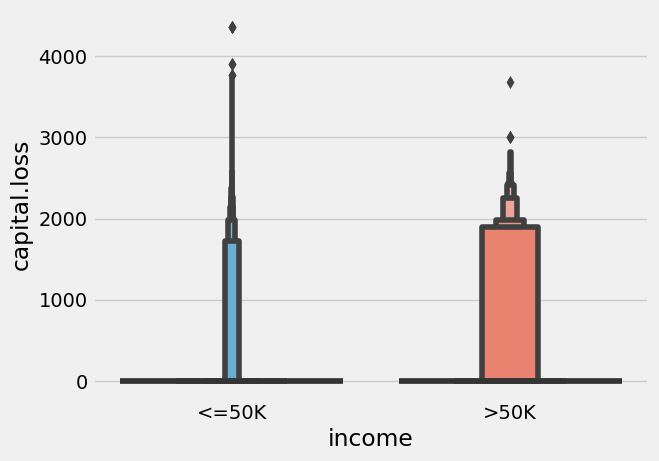

In [925]:
sns.boxenplot(data=df, x='income', y='capital.loss')

Let's check its own distribution, looking for outliers again:

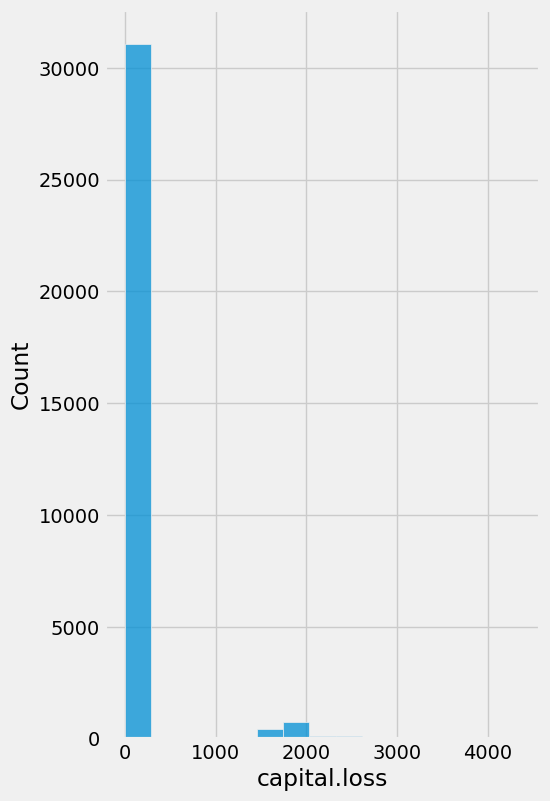

In [926]:
plt.figure(figsize=(5, 9))
sns.histplot(df['capital.loss'], bins = 15)
plt.show()

Checking the distributions in both datasets:

1. Train Dataset:

In [927]:
df['capital.loss'].value_counts().sort_index()

capital.loss
0       31041
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: count, Length: 92, dtype: int64

In [928]:
mask = (df['capital.loss'] == 3770) | (df['capital.loss'] == 3900) | (df['capital.loss'] == 4356)
df[mask][['capital.loss', 'income']]

,capital.loss,income
931,3770,<=50K
1528,3900,<=50K
5687,4356,<=50K
10335,4356,<=50K
10699,3900,<=50K
16516,4356,<=50K
32227,3770,<=50K


2. Test Dataset:

In [929]:
test['capital.loss'].value_counts().sort_index()

capital.loss
0       15517
213         1
323         2
625         5
653         1
        ...  
2603        2
2824        4
3004        3
3175        2
3770        2
Name: count, Length: 82, dtype: int64

We can conclude that capital loss is really imbalanced, but its value range is not as great as capital gain one. Also, we could see in the boxplot above that the feature has impact on the target, thus, we may keep it untouched as well.

### Final Results:

In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   education.num   32560 non-null  int64 
 4   marital.status  32560 non-null  object
 5   occupation      32560 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital.gain    32560 non-null  int64 
 10  capital.loss    32560 non-null  int64 
 11  hours.per.week  32560 non-null  int64 
 12  native.country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [931]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   education       16280 non-null  object
 3   education.num   16280 non-null  int64 
 4   marital.status  16280 non-null  object
 5   occupation      16280 non-null  object
 6   relationship    16280 non-null  object
 7   race            16280 non-null  object
 8   sex             16280 non-null  object
 9   capital.gain    16280 non-null  int64 
 10  capital.loss    16280 non-null  int64 
 11  hours.per.week  16280 non-null  int64 
 12  native.country  16280 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.6+ MB


No more NaN values. It's important to reassure that we've only replaced the null values because they were a small part of the original dataset. If their percentage was too big, we'd have to take other actions.

# Data Analysis

Analysing again the new distributions after cleaning the dataset and comparing them with the U.S. reality.

In [932]:
plt.style.use('fivethirtyeight') # choosing a style for the plots

### Workclass Distribution

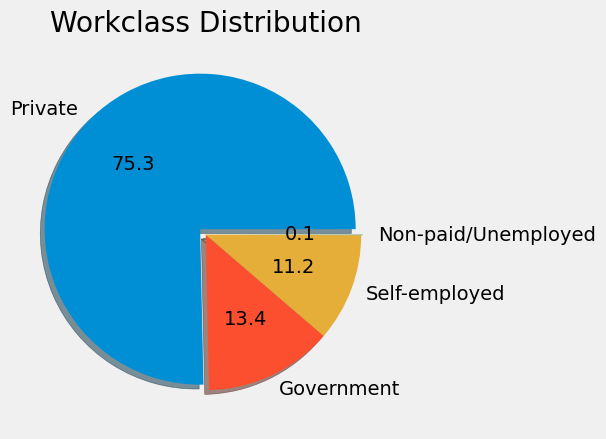

<Figure size 640x480 with 0 Axes>

In [933]:
wc = df.workclass.value_counts()
plt.pie(wc, labels= wc.index, autopct="%.1f", shadow = True, explode=[0.05, 0, 0, 0.01])
plt.title("Workclass Distribution")
plt.show()
plt.tight_layout()

Above, we can see that most people (3/4) in the dataset work for private initiatives while (1/8) work for the government and the other 1/8 is self-employed. Too few people do not work or do volunteer work.  

### Education Distribution

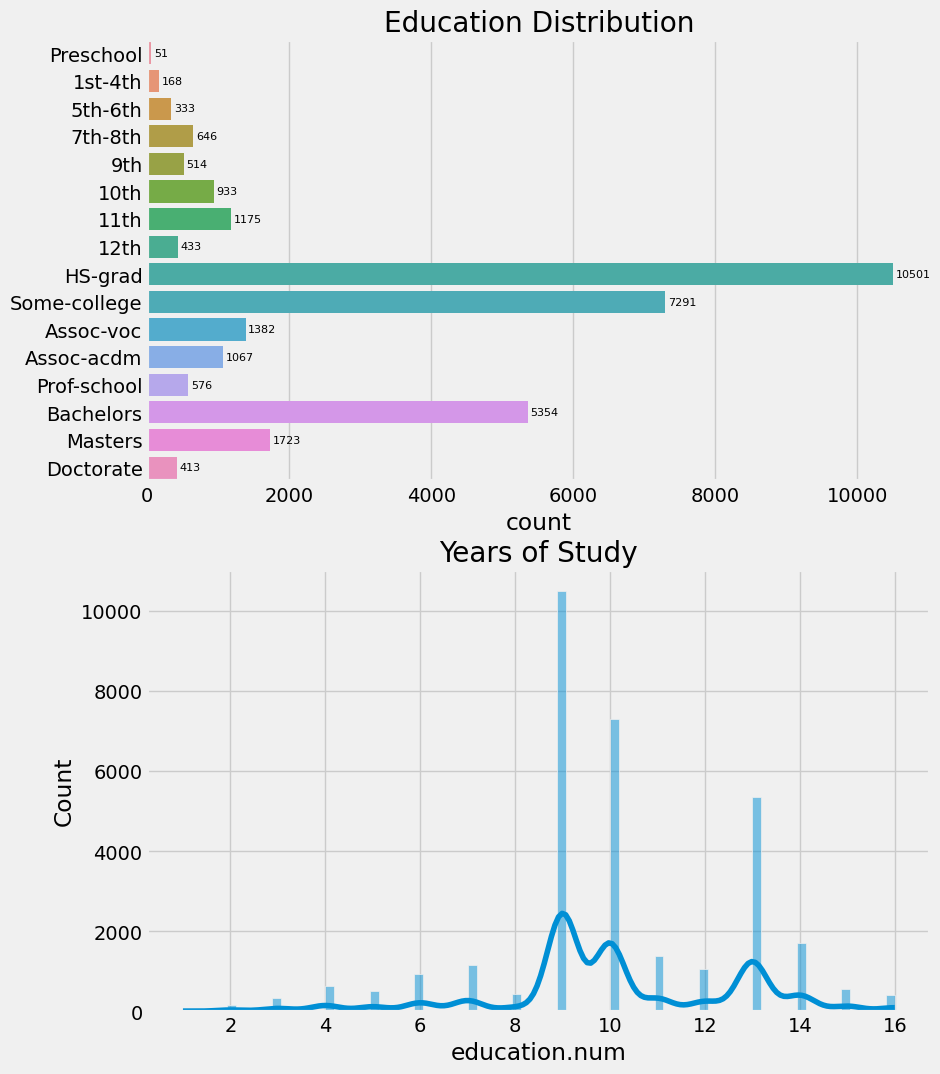

In [934]:
plt.figure(figsize=(9, 12))

plt.subplot(2, 1, 1)
order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 
                 'Doctorate']
educ = sns.countplot(y = df['education'], order = order)

for i in educ.patches:
    educ.annotate(int(i.get_width()),  # Usando get_width() para pegar a largura do retângulo
                (i.get_width(), i.get_y() + i.get_height() / 2),  # Posição da anotação
                ha='left',  # Alinhamento horizontal
                va='center',  # Alinhamento vertical
                fontsize=8,
                color='black',
                xytext=(2, 0),  # Deslocamento da anotação
                textcoords='offset points')

plt.title("Education Distribution")
plt.ylabel("")

plt.subplot(2, 1, 2)
plt.title('Years of Study')
sns.histplot(df['education.num'], kde=True)

plt.show()

We can see from the two charts above that most people in the dataset is educated, since most of them have 9+ years of education or concluded at least high school. This reflects the real education distribution in the U.S., which, as a developed country, consequently has an adult population with a high education level.

### Marital Status Distribution

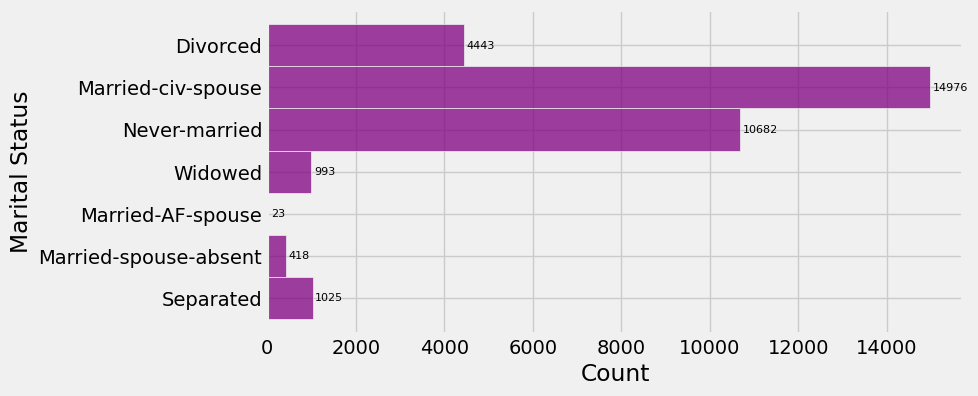

In [936]:
## histogram to count the frequency of each status - using histplot from sns

plt.figure(figsize=(8, 4))
mari = sns.histplot(y =df['marital.status'], color = 'purple')


for i in mari.patches:
    mari.annotate(int(i.get_width()),  # Usando get_width() para pegar a largura do retângulo
                (i.get_width(), i.get_y() + i.get_height() / 2),  # Posição da anotação
                ha='left',  # Alinhamento horizontal
                va='center',  # Alinhamento vertical
                fontsize=8,
                color='black',
                xytext=(2, 0),  # Deslocamento da anotação
                textcoords='offset points')
    
plt.ylabel("Marital Status")
plt.show()

We can see from the chart above that most people in the dataset are married and living w/ their spouse or have never married. In third place, there are people who are divorced. 

### Relationship Distribution

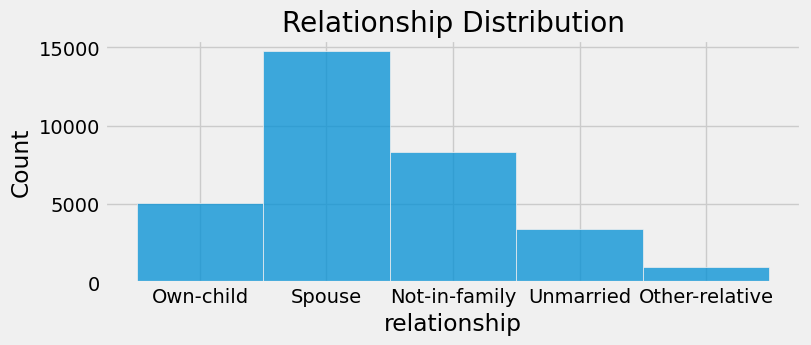

In [937]:
plt.figure(figsize=(8,3))
sns.histplot(df.relationship)
plt.title('Relationship Distribution')
plt.show()

We can see from this distribution that most people in the dataset either live with their spouse or live by themselves, alone.

### Race Distribution

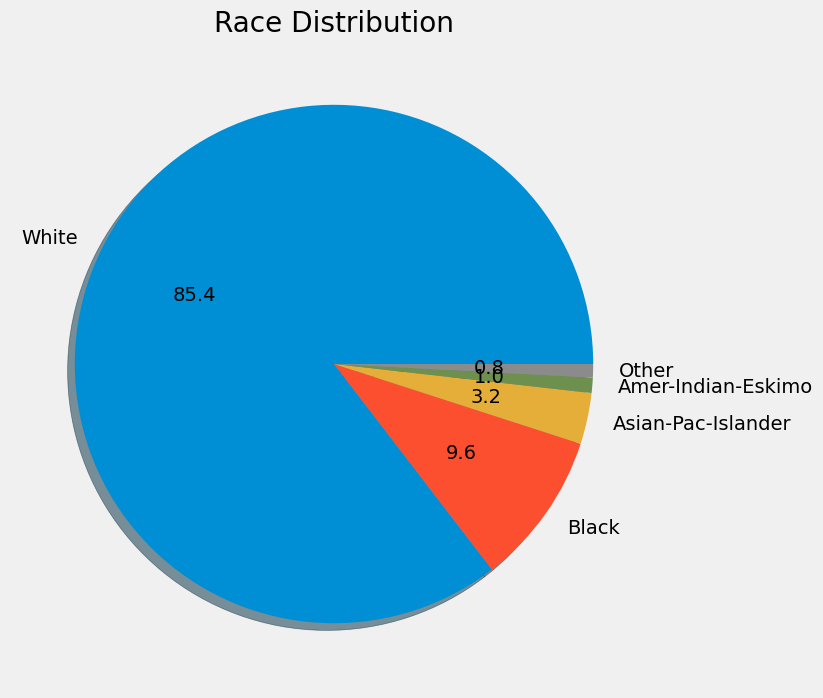

In [938]:
plt.figure(figsize=(8, 8))
rc = df.race.value_counts()
plt.pie(rc, labels = rc.index, autopct="%.1f", shadow = True)
plt.title('Race Distribution')
plt.show()

We can see that most people (85%) in the dataset are white, and in second place comes black people (10%). This distribution doesn't seem to fit the 2000's (a really close period to the dataset's) racial participation in the U.S., which, according to the Census Bureau, had White people compose 75% of the population, while Hispanic people - not represented here - 12,5%.

### Sex Distribution

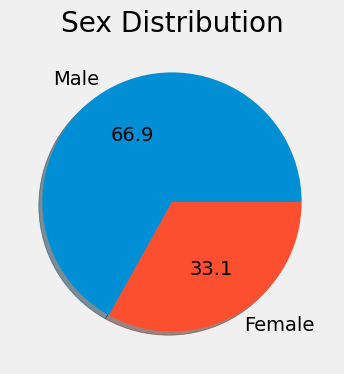

In [939]:
plt.figure(figsize=(4, 4))
sex = df.sex.value_counts()
plt.pie(sex, labels = sex.index, autopct="%.1f", shadow = True)
plt.title('Sex Distribution')
plt.show()

We can also see that the dataset seems imbalanced in terms of sex. While the population of the U.S. from the 2000's was almost equally distributed between male and female, the dataset has twice men as women.

### Origin Distribution

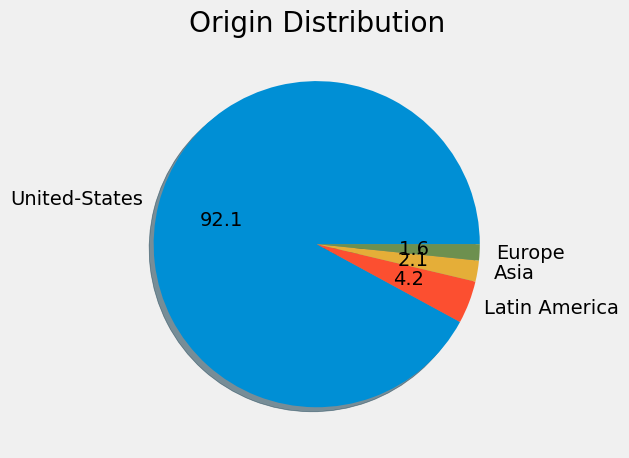

In [940]:
origin = df['native.country'].value_counts()[['United-States', 'Latin America', 'Asia', 'Europe']]
plt.pie(origin, labels = origin.index, autopct="%.1f", shadow = True)
plt.title('Origin Distribution')
plt.tight_layout()
plt.show()

In [941]:
# we are analysing 99% of the dataset above.
# Puerto Rico, Canada and Outlying-US were dropped for a better analysis - they consist of an extremely small percentage of the column
df['native.country'].value_counts()[['United-States', 'Latin America', 'Asia', 'Europe']].sum()/df['native.country'].value_counts().sum()

0.9923525798525799

We can see in the graph above the distribution of origins for most of the population (99%). We can see that most people in it are from the U.S. itself, while only 4% are from Latin American countries, and even less from Asia and Europe. 

### Target Distribution

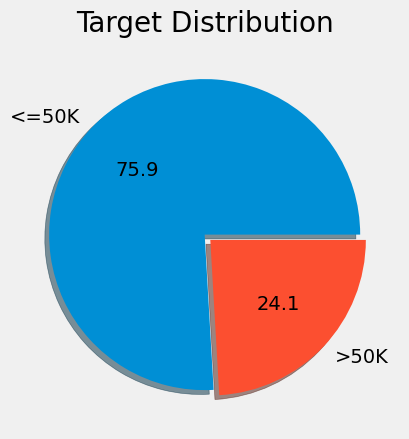

In [942]:
income = df.income.value_counts()
plt.pie(income, labels = income.index, autopct="%.1f", shadow = True, explode=[0, 0.05])
plt.title('Target Distribution')
plt.show()

We can see above that the target column is also imbalanced. The dataset contains 3/4 of people who have less than 50K as income, while 1/4 of people who receive more than that.<br>
This guides us to try other metrics rather than accuracy to evaluate our model later.

### Income (Target) X Origin

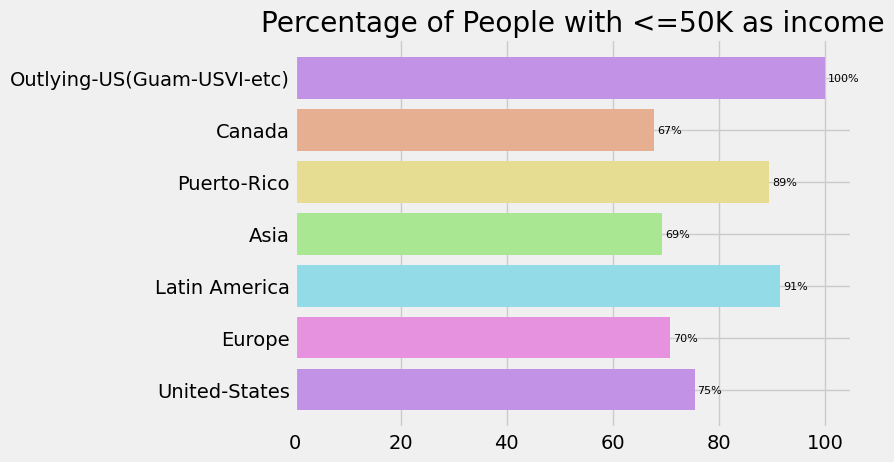

In [943]:
x = df.groupby('native.country')['income'].value_counts()  ## groupby - will aggregate the dataset in groups by the unique value of the column given
# x is a series that counts how many people from each location have >50K and <=50K as income

below_50_mean = {} # dictionary to store the percentage of people with <50K as income for each location

origins = df['native.country'].unique() # possible origins

for location in origins:
    below_50_mean[location] = x[location]['<=50K']/x[location].sum()*100

ax = plt.barh(y=list(below_50_mean.keys()), width=list(below_50_mean.values()), color=['#C292E7', '#E792DE', '#92DBE7', '#AAE792', '#E7DD92', '#E7AF92'])

for patch in ax.patches:
    plt.annotate(str(int(patch.get_width())) + '%',  # Usando get_width() para pegar a largura do retângulo
                (patch.get_width(), patch.get_y() + patch.get_height() / 2),  # Posição da anotação
                ha='left',  # Alinhamento horizontal
                va='center',  # Alinhamento vertical
                fontsize=8,
                color='black',
                xytext=(2, 0),  # Deslocamento da anotação
                textcoords='offset points')
plt.title('Percentage of People with <=50K as income')
plt.show()

We can that for people from the dataset, people from Europe, Asia, Canada and the U.S. have at least 25% who receive more than 50K as income.<br> On the other hand, people in the dataset who are from Puerto-Rico, Latin America or Outlying-US locations have less people who fit this profile. This indicates a finantial difference originary from a social one - developed locations have a higher percentage of people with more than 50K as income. <br>
We can also wee that the dataset has some classes imbalanced - for example, people from Outlying-US locations are all in the <=50K label, which is an extreme afirmation for reality.

### Numerical Features Distributions on the Target

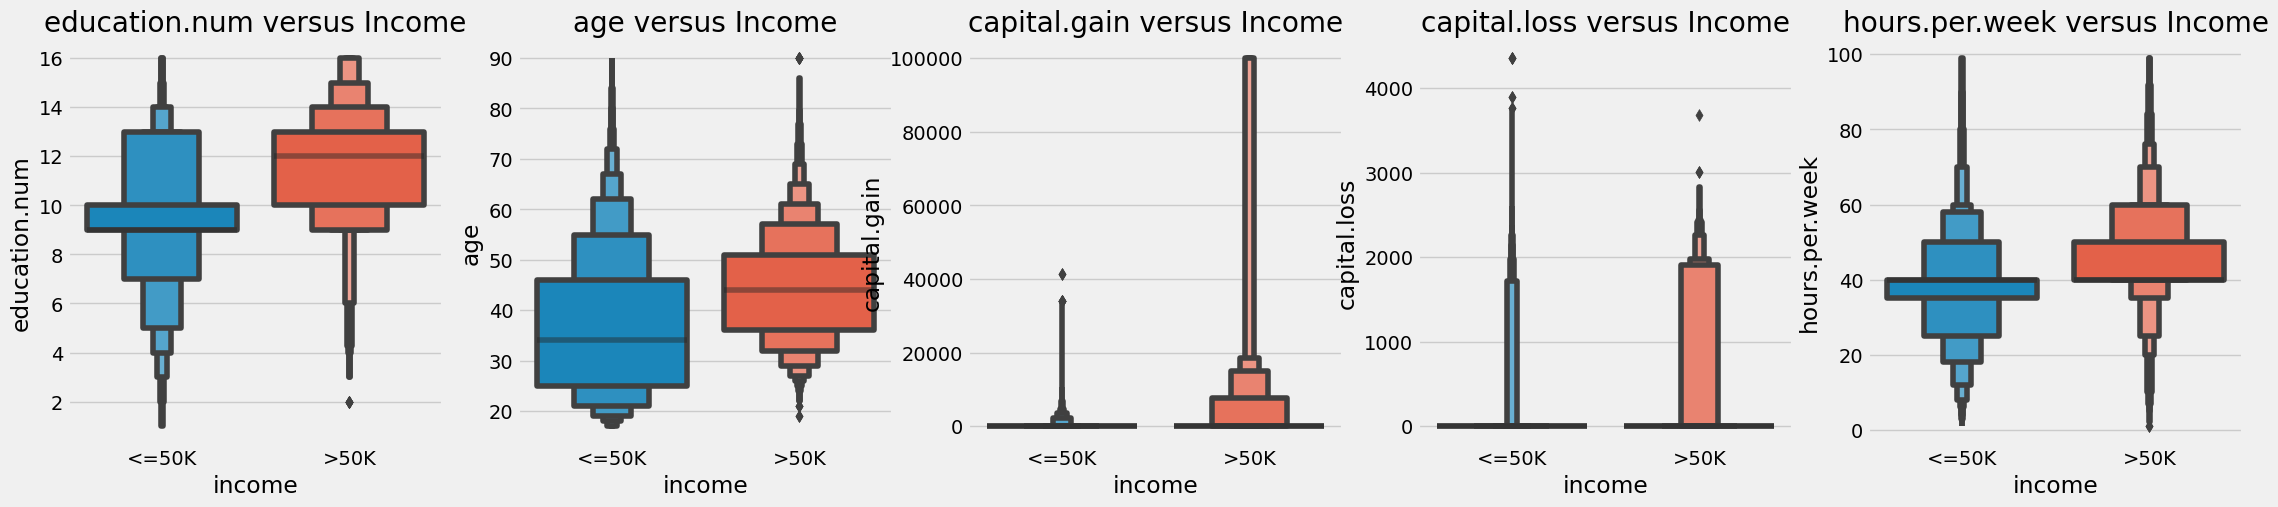

In [944]:
continuous_features = ['education.num', 'age', 'capital.gain', 'capital.loss', 'hours.per.week']
plt.figure(figsize=(25, 5))
for i, column in enumerate(continuous_features):
    plt.subplot(1, len(continuous_features), i+1)
    sns.boxenplot(x='income', y=column, data=df)
    plt.title('{} versus Income'.format(column))

We can see the distribution in each income label based on each numerical feature. <br>
For people who receive more than 50K as income, we can infer that it is common for them to have more years of study, to be slightly older than the average <=50K people, to have more capital sources other than their usual work and to work more per week as well.

# Data Preprocessing

In [945]:
from sklearn.preprocessing import OneHotEncoder ## for one-hot encoding
from sklearn.preprocessing import OrdinalEncoder ## for ordinal encoding
from sklearn.preprocessing import MinMaxScaler ## for normalization
from sklearn.model_selection import train_test_split  ## for train and test splitting

Creating an One-Hot Encoder object to transform categorical unordered features:

In [946]:
ohe = OneHotEncoder(sparse_output=False)

Sex Column:

In [947]:
is_male = pd.DataFrame(ohe.fit_transform(df.sex.values.reshape(-1, 1)), columns = ohe.get_feature_names_out(['sex']))['sex_Male']
df['is_male'] = is_male
df.drop('sex', axis=1, inplace=True)

In [948]:
is_male = pd.DataFrame(ohe.fit_transform(test.sex.values.reshape(-1, 1)), columns = ohe.get_feature_names_out(['sex']))['sex_Male']
test['is_male'] = is_male
test.drop('sex', axis=1, inplace=True)

Other columns:

In [949]:
for feature in categorical_features:
    # one-hot encoding for train dataset
    aux = pd.DataFrame(ohe.fit_transform(df[feature].values.reshape(-1, 1)), columns = ohe.get_feature_names_out([feature]))
    df = pd.concat([df, aux], axis=1).drop(feature, axis = 1)
    # one-hot encoding for test dataset
    ohe = OneHotEncoder(sparse_output=False)
    aux = pd.DataFrame(ohe.fit_transform(test[feature].values.reshape(-1, 1)), columns = ohe.get_feature_names_out([feature]))
    test = pd.concat([test, aux], axis=1).drop(feature, axis = 1)

Sex column was done isolated because it can be reduced to just one new feature instead of two - and the one-hot encoder object would necessarily transform it into two new features.

Ordinal Encoding for the education feature

In [950]:
categories_ed = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 
                 'Doctorate']
oe = OrdinalEncoder(categories=[categories_ed]) #creating an ordinal encoder

In [951]:
## train dataset
new_educ = pd.DataFrame(oe.fit_transform(df.education.values.reshape(-1, 1)), columns=['education'])
df.drop('education', axis=1, inplace=True)
df = pd.concat([df, new_educ], axis=1)

## test dataset
new_educ = pd.DataFrame(oe.fit_transform(test.education.values.reshape(-1, 1)), columns=['education'])
test.drop('education', axis=1, inplace=True)
test = pd.concat([test, new_educ], axis=1)

In [952]:
df

,age,education.num,capital.gain,capital.loss,hours.per.week,income,is_male,workclass_Government,workclass_Non-paid/Unemployed,workclass_Private,...,race_Other,race_White,native.country_Asia,native.country_Canada,native.country_Europe,native.country_Latin America,native.country_Outlying-US(Guam-USVI-etc),native.country_Puerto-Rico,native.country_United-States,education
0,34,10,0,0,44,<=50K,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1,58,6,0,0,40,<=50K,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
2,25,10,0,0,42,<=50K,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
3,24,10,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
4,57,9,5178,0,60,>50K,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,42,14,7688,0,40,>50K,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
32556,23,9,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
32557,30,9,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0
32558,18,9,0,0,25,<=50K,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


Creating a normalization object for continuous features:

In [953]:
scaler = MinMaxScaler() 


Applying it on the continuous features:

In [954]:
for feature in continuous_features:
    df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))
    test[feature] = scaler.fit_transform(test[feature].values.reshape(-1, 1))

# Building a KNN Model

In [955]:
from sklearn.neighbors import KNeighborsClassifier ## importing the KNN class
from sklearn.model_selection import cross_val_score ## importing the cross-validation

First, we are going to search for the best K for our model - the one who isn't neither underfitting nor overfitting.<br>
Let's do this by computing empirical error rates for many K's:

In [965]:
score_dict = {}
n_folds = 6 ## we are going to fix the number of folds for cross-validation at 6
X = df.drop('income', axis = 1)
y = df[['income']]

for i in range(1, 70): ## trying k from 1 to 100
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn, X, np.ravel(y), cv=n_folds, scoring='accuracy')
    scores = np.ones(scores.size) - scores
    score_dict[i] = scores.mean()

Let's now plot these rates to visualize them better:

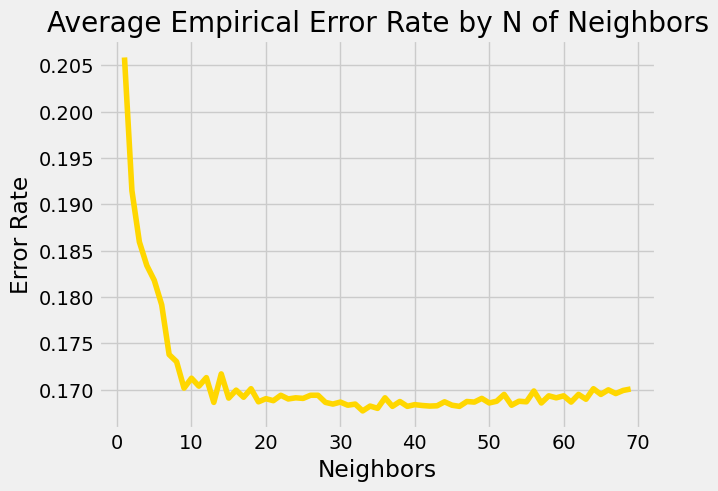

In [966]:
plt.plot(score_dict.keys(), score_dict.values(), c = 'Gold')
plt.title('Average Empirical Error Rate by N of Neighbors')
plt.xlabel('Neighbors')
plt.ylabel('Error Rate')
plt.show()

We can see that after a certain number of neighbors N, the empirical error rate settles, and after a certain number N', it can also start to increase again. Thus, the best K is between N and N'.

Therefore, let's choose the k that holds the least error rate within the interval analyzed.

In [967]:
best_k = min(score_dict, key=score_dict.get)
print(best_k)

33


### Computing Precision and Recall on the best K

In [968]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 

Since our dataset has imbalanced classes, we should also check other metrics apart from accuracy/error rate to check if it is doing well on the minor class, too. <br>
Here, we are going to use precision, recall and the F1-score on the '>50K' label (the one least present in the dataset).

In [969]:
## creating an auxiliary dataset with a binary income (it is necessary to calculate precision and recall using sklearn)
def binary(value):
    if value == '>50K':
        value = 1
    elif value == '<=50K':
        value = 0
    return value

binary_income = df
binary_income.income = binary_income.income.apply(binary)
X = binary_income.drop('income', axis=1)
y = binary_income.income

Let's now divide our dataset into train and test temporarily to evaluate it.

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)

Now, we create the KNN object, train it with the train dataset, predict the test dataset, instantiate our 3 metrics and, finally, compute them.

In [971]:
knn = KNeighborsClassifier(best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

p = precision_score(y_test, y_pred)
print(f'Precision: {p}')

r = recall_score(y_test, y_pred)
print(f'Recall: {r}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Precision: 0.6820135052179251
Recall: 0.5605449041372351
F1 Score: 0.6153420105234008


We can see that the precision is a bit greater than the recall and, therefore, the F1-score is afected by both of them, standing in the middle. <br>
The metrics, which are very sensitive - way more than accuracy - are reasonably good.

### Training our final model and computing the predictions

Let's now train our model with our best K as hyperparameter and also using all the training dataset for fitting:

In [972]:
X = df.drop('income', axis = 1) # covariables
y = df[['income']] # target

model = KNeighborsClassifier(best_k)
model.fit(X, np.ravel(y))
print(model.score(X, np.ravel(y))) # score of the model on the own train dataset
predicoes = model.predict(test)

0.8406633906633907


Creating the submission file:

In [973]:
submission = pd.DataFrame(columns=['Id', 'income'])
submission.Id = test.index
submission.income = predicoes
submission.to_csv("submission.csv", index=False)